## Question 01

<StemContainer object of 3 artists>

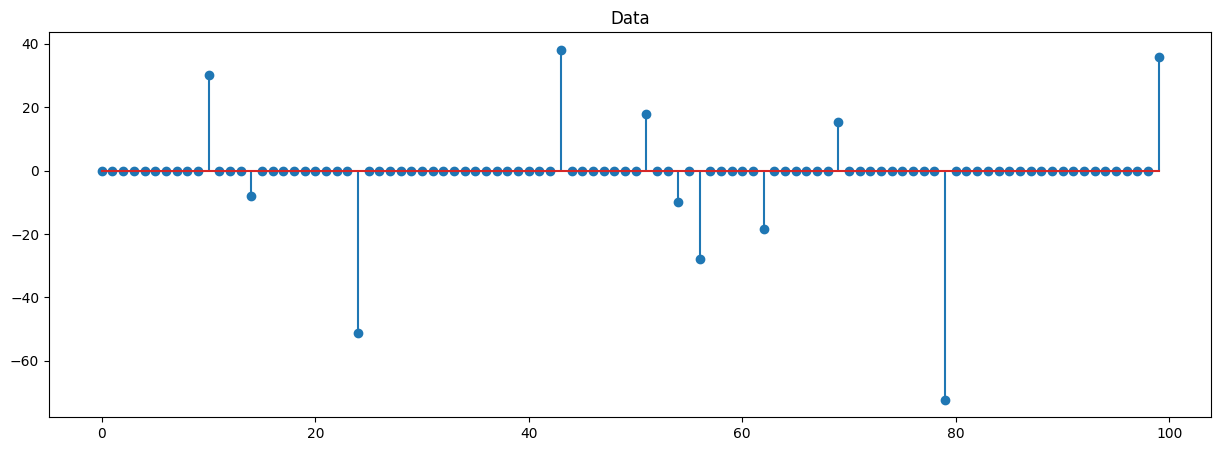

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(signal_length, num_nonzero):
    
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 50*np.random.randn(num_nonzero)  
    signal[nonzero_indices] = nonzero_values
    return signal

signal_length = 100  # Total length of the signal
num_nonzero = 10    # Number of non-zero elements in the signal
your_index_no=200242 # Enter without english letter and without leading zeros
signal = generate_signal(signal_length, num_nonzero)
signal[10] = (your_index_no % 10)*10 + 10
if  your_index_no % 10 == 0:
  signal[10] = np.random.randn(1) + 30


signal=signal.reshape(signal_length,1)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data")
plt.stem(signal)


<StemContainer object of 3 artists>

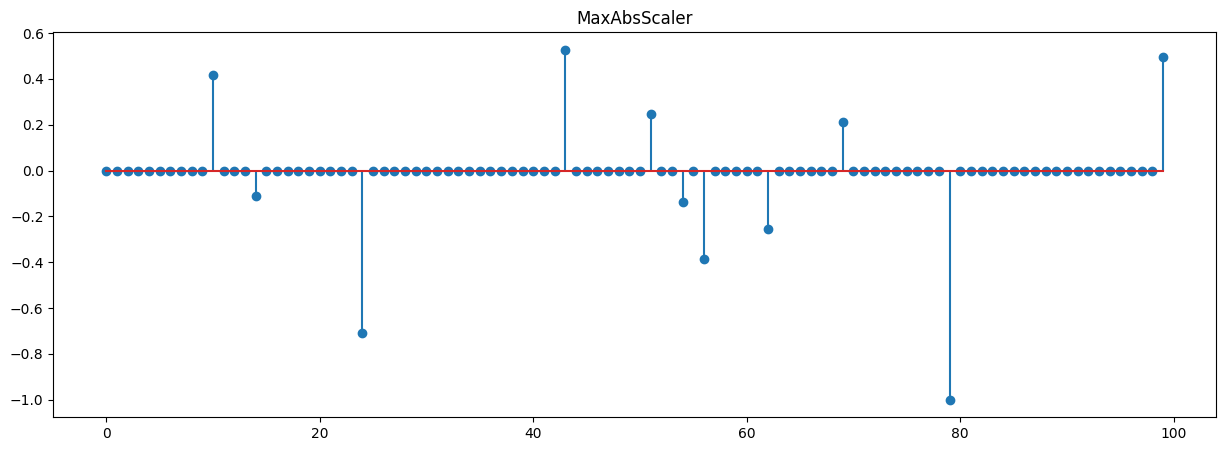

In [4]:
from sklearn import preprocessing

max_abs_scaler = preprocessing.MaxAbsScaler()
max_abs_signal = max_abs_scaler.fit_transform(signal)

plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("MaxAbsScaler")
plt.stem(max_abs_signal)


In [5]:
def min_max_scale(data):
    min_val = np.min(data)
    max_val = np.max(data)
    print("min of data", min_val, "max of data", max_val)
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data


scaled_data_min_max = min_max_scale(signal)

min of data -72.28720923244963 max of data 38.10242985762472


In [10]:
def standard_normalizing(data):
    mean = np.mean(data)
    std = np.std(data)
    print("mean of data", mean, "std of data", std)
    standardized_data = (data - mean) / std
    return standardized_data
    
scaled_starndardized_data = standard_normalizing(signal)

mean of data -0.5031882487123851 std of data 11.538751412703649


<StemContainer object of 3 artists>

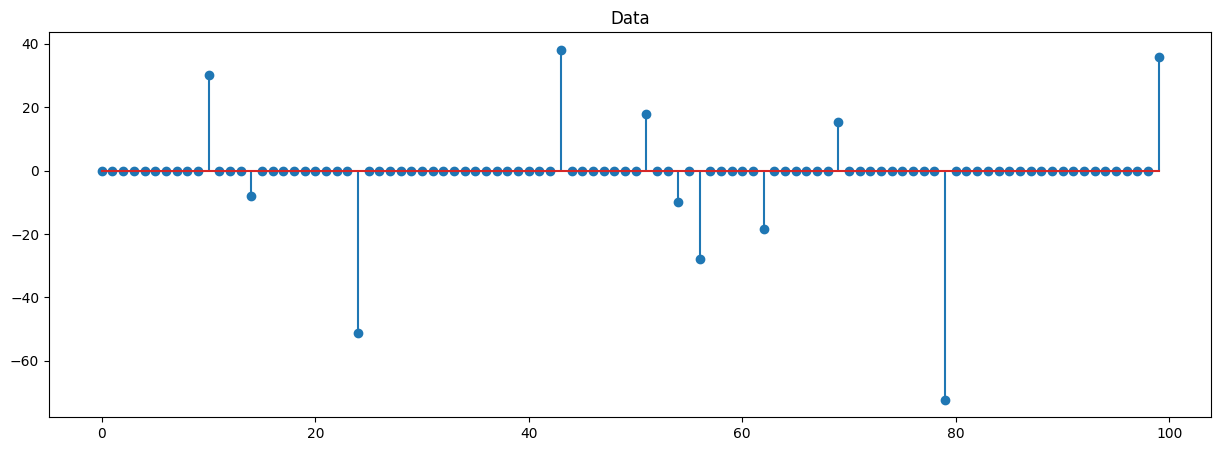

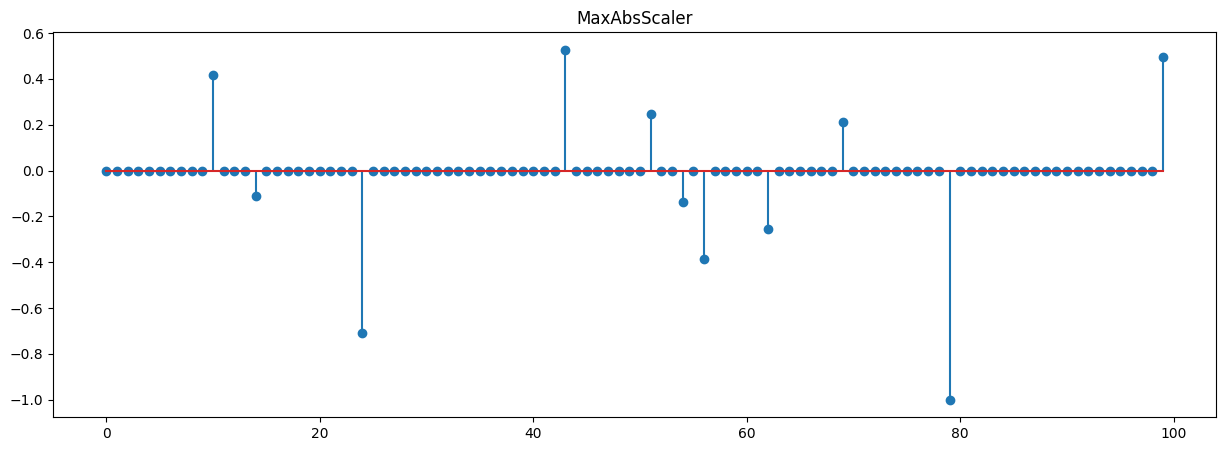

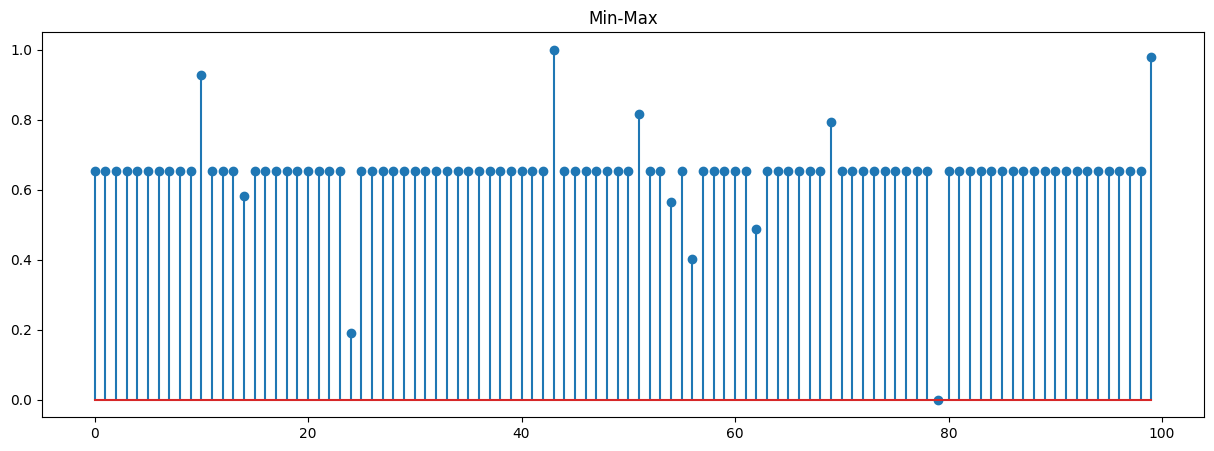

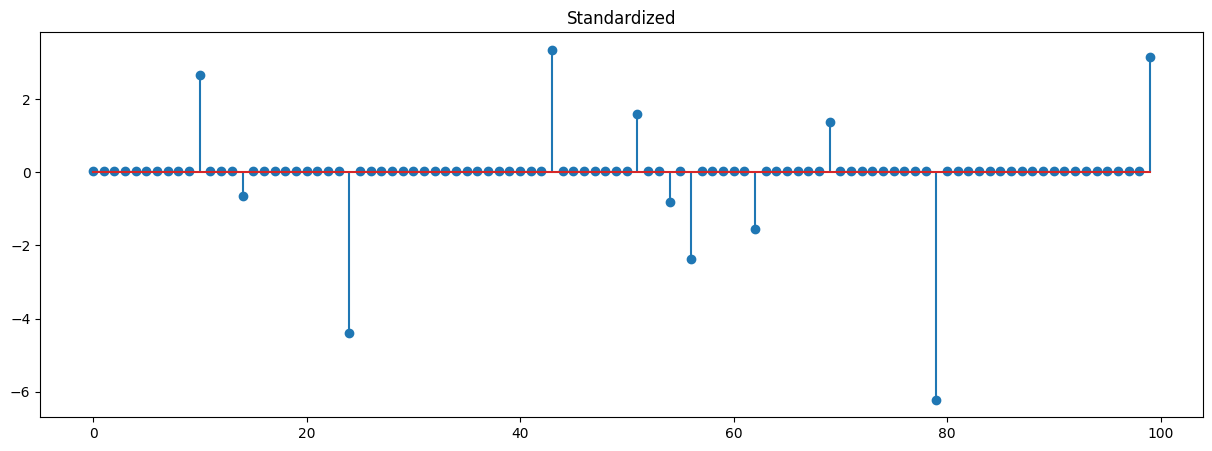

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title('Data')
plt.stem(signal)

plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title('MaxAbsScaler')
plt.stem(max_abs_signal)

plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title('Min-Max')
plt.stem(scaled_data_min_max)

plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title('Standardized')
plt.stem(scaled_starndardized_data)

In [12]:
print('non zero values of signal', np.count_nonzero(signal))
print('non zero values of max_abs_signal', np.count_nonzero(max_abs_signal))
print('non zero values of scaled_data_min_max', np.count_nonzero(scaled_data_min_max))
print('non zero values of scaled_starndardized_data', np.count_nonzero(scaled_starndardized_data))


non zero values of signal 11
non zero values of max_abs_signal 11
non zero values of scaled_data_min_max 99
non zero values of scaled_starndardized_data 100


## Question 02

In [22]:
import pandas as pd

advertising_data = pd.read_csv('Advertising.csv')
print(advertising_data.shape)
print(advertising_data.head())
advertising_data.describe()

(200, 5)
   sample index     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9


,sample index,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [25]:
data_x = advertising_data[['TV', 'radio', 'newspaper']]
data_y = advertising_data['sales']

print('data_x shape', data_x.shape)
print('data_y shape', data_y.shape)


data_x shape (200, 3)
data_y shape (200,)


In [26]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=200242)

print('train_x shape', train_x.shape)
print('train_y shape', train_y.shape)
print('test_x shape', test_x.shape)
print('test_y shape', test_y.shape)


train_x shape (160, 3)
train_y shape (160,)
test_x shape (40, 3)
test_y shape (40,)


In [27]:
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()
linear_regression_model.fit(train_x, train_y)

print('intercept', linear_regression_model.intercept_)
print('coefficients', linear_regression_model.coef_)
print('feature names', data_x.columns)

predicted_y = linear_regression_model.predict(test_x)

print('predicted_y shape', predicted_y.shape)
print('test_y shape', test_y.shape)



intercept 3.1044991716839743
coefficients [ 0.04543683  0.18199702 -0.00240945]
feature names Index(['TV', 'radio', 'newspaper'], dtype='object')
predicted_y shape (40,)
test_y shape (40,)


In [31]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(test_y, predicted_y)
r_squared = r2_score(test_y, predicted_y)

print('mean squared error', mse)
print('r-squared', r_squared)

def rss(y, y_hat):
    return np.sum(np.square(y - y_hat))

print('residual sum of squares', rss(test_y, predicted_y))

def rse(y, y_hat):
    return np.sqrt(np.sum(np.square(y - y_hat)) / (len(y) - 3))

print('residual standard error', rse(test_y, predicted_y))

mean squared error 2.0502100002224912
r-squared 0.9408440153285591
residual sum of squares 82.00840000889966
residual standard error 1.4887723947883285
